# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import re
%matplotlib inline

### Importing the Data from the `.csv` file into a dataframe.

In [4]:
df = pd.read_csv('poli_complete.csv')

In [5]:
df.head()

,author,created_utc,domain,downs,id,num_comments,score,selftext,subreddit,subreddit_id,title,ups
0,ToadProphet,1.527675e+09,washingtonpost.com,0,8n7f58,808,15418,0,politics,t5_2cneq,federal prosecutors poised to get more than 1 ...,15418
1,fuzzyshorts,1.527680e+09,axios.com,0,8n7tbv,536,6809,0,politics,t5_2cneq,hurricane maria killed more people than 9/11 o...,6809
2,today_okay,1.527686e+09,haaretz.com,0,8n8fvu,254,3295,0,politics,t5_2cneq,it's been 467 days since trump held his last p...,3295
3,Usawasfun,1.527681e+09,thehill.com,0,8n7ydg,246,4010,0,politics,t5_2cneq,fox news’s napolitano: trump’s ‘spygate’ claim...,4010
4,Usawasfun,1.527685e+09,axios.com,0,8n8crl,647,3139,0,politics,t5_2cneq,"trump: ""i wish"" i didn't pick jeff sessions as...",3139


### Data Collected:
- **Total Columns:** 12
- **Total Rows:** 1821 

In [4]:
df.shape

(1821, 12)

### Qualitative Data:

#### Taking a look at the data.

The `Author` feature has 36 values under `[deleted]`, these are missing values, but will not be changed to 'NA' since the values will not impact the models.

In [5]:
df.describe(include=['object'])

,author,domain,id,selftext,subreddit,subreddit_id,title
count,1821,1821,1821,1821,1821,1821,1821
unique,1059,417,1821,40,2,2,1795
top,[deleted],i.redd.it,8moron,0,europe,t5_2qh4j,china approves 13 new ivanka trump trademarks ...
freq,36,218,1,1782,965,965,4


### Quantitative Data:

In [6]:
df.describe()

,created_utc,downs,num_comments,score,ups
count,1.821000e+03,1821.0,1821.000000,1821.000000,1821.000000
mean,1.527520e+09,0.0,74.387150,726.467326,726.467326
std,2.220877e+05,0.0,245.210184,3083.566126,3083.566126
min,1.521615e+09,0.0,0.000000,0.000000,0.000000
25%,1.527443e+09,0.0,3.000000,10.000000,10.000000
50%,1.527588e+09,0.0,12.000000,40.000000,40.000000
75%,1.527640e+09,0.0,40.000000,212.000000,212.000000
max,1.527701e+09,0.0,4147.000000,42629.000000,42629.000000


### Taking a further look at the data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 12 columns):
author          1821 non-null object
created_utc     1821 non-null float64
domain          1821 non-null object
downs           1821 non-null int64
id              1821 non-null object
num_comments    1821 non-null int64
score           1821 non-null int64
selftext        1821 non-null object
subreddit       1821 non-null object
subreddit_id    1821 non-null object
title           1821 non-null object
ups             1821 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 170.8+ KB


### Correlation Heatmap:

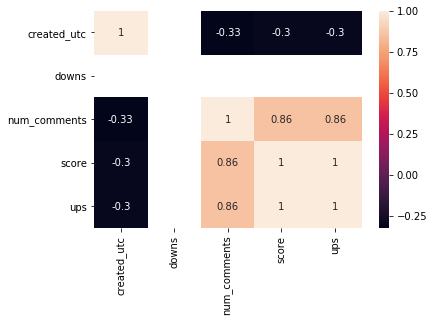

In [6]:
sns.heatmap(df.corr(), annot=True);


### Inspecting Missing Values:

In [8]:
df.isnull().sum()

author          0
created_utc     0
domain          0
downs           0
id              0
num_comments    0
score           0
selftext        0
subreddit       0
subreddit_id    0
title           0
ups             0
dtype: int64

### Replacing Missing Data:

In [9]:
df.fillna({'selftext': 0}, inplace = True)

In [10]:
df.isnull().sum().sum()

0

### Inspecting the `selftext`

In [11]:
len(df.selftext.value_counts())

40

In [12]:
df.selftext.describe() # 40 have self text

count     1821
unique      40
top          0
freq      1782
Name: selftext, dtype: object

In [13]:
df.drop('selftext', 1, inplace=True)

In [14]:
df.head(2)

,author,created_utc,domain,downs,id,num_comments,score,subreddit,subreddit_id,title,ups
0,ToadProphet,1.527675e+09,washingtonpost.com,0,8n7f58,808,15418,politics,t5_2cneq,federal prosecutors poised to get more than 1 ...,15418
1,fuzzyshorts,1.527680e+09,axios.com,0,8n7tbv,536,6809,politics,t5_2cneq,hurricane maria killed more people than 9/11 o...,6809


### Inspecting Duplicates:

In [15]:
df.shape

(1821, 11)

In [16]:
df.title.duplicated().sum()

26

In [17]:
df.author.duplicated().sum()

762

In [18]:
df.id.duplicated().sum()

0

In [19]:
df.created_utc.duplicated().sum()

9

In [20]:
df.duplicated(['author', 'title', 'created_utc']).sum()

0

In [21]:
df.duplicated(['author', 'title', 'created_utc', 'id']).sum()

0

### Dropping Duplicated Rows: 

In [22]:
df.drop_duplicates(['id', 'author', 'title', 'created_utc'], inplace = True);
df.shape

(1821, 11)

--------------------

# Feature Engineering:

----------------

### Converting the values under `title`  into lowercase:

In [23]:
df['title'] = df['title'].apply(lambda x: x.lower())

In [24]:
df[['title']].head()

,title
0,federal prosecutors poised to get more than 1 ...
1,hurricane maria killed more people than 9/11 o...
2,it's been 467 days since trump held his last p...
3,fox news’s napolitano: trump’s ‘spygate’ claim...
4,"trump: ""i wish"" i didn't pick jeff sessions as..."


### Cleaning the `title` - Deleting all Non-Alphabetic values:

In [25]:
#df.title.apply(lambda x: re.sub('[^a-z\s]', '', x))

In [26]:
df['title'] = df.title.str.replace('[^a-z\s]', '')

In [27]:
df.title.head()

0    federal prosecutors poised to get more than  m...
1    hurricane maria killed more people than  or ka...
2    its been  days since trump held his last press...
3    fox newss napolitano trumps spygate claims are...
4    trump i wish i didnt pick jeff sessions as att...
Name: title, dtype: object

### Number of Words Per `Title`:

In [28]:
len_title = [len(x.split()) for x in df.title]

In [29]:
len_title_df = pd.DataFrame(len_title)

In [30]:
len_title_df.rename(columns={0: 'words_per_title'}, inplace=True)

In [31]:
len_title_df.head()

,words_per_title
0,14
1,8
2,10
3,8
4,11


## Total Sum of Words under `Title`:

#### Total: 19,499

In [32]:
len_title_df.sum()

words_per_title    19499
dtype: int64

### Converting the `author` values into lowercase.

In [33]:
df['author'] = df['author'].apply(lambda x: x.lower())

In [34]:
df[['author']].head()

,author
0,toadprophet
1,fuzzyshorts
2,today_okay
3,usawasfun
4,usawasfun


### Removing the Domain:

In [35]:
df.domain.value_counts().head()

i.redd.it             218
thehill.com            73
washingtonpost.com     58
reuters.com            56
nytimes.com            51
Name: domain, dtype: int64

In [36]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.com',''))

In [37]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.eu',''));

In [38]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.org',''));

In [39]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.au',''));

In [40]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.eu',''));

In [41]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.es',''));

In [42]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.it',''));

In [43]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.co.uk',''));

In [44]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.be',''));

In [45]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.lv',''));

In [46]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.tr',''));

In [47]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.blog',''));

In [48]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.ajac',''));

In [49]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.lsm',''));

In [50]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.lv',''));

In [51]:
df['domain'] = df['domain'].apply(lambda x: x.replace('i.',''));

In [52]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.ro',''));

In [53]:
df['domain'] = df['domain'].apply(lambda x: x.replace('.dk',''));

In [54]:
df.domain.head()

0    washingtonpost
1             axios
2           haaretz
3           thehill
4             axios
Name: domain, dtype: object

### Inspecting the `Subreddit` values:

In [55]:
df.subreddit.value_counts()

europe      965
politics    856
Name: subreddit, dtype: int64

### Saving the data into a `.csv` file:

In [56]:
df.to_csv('poli_2_modified.csv', index=False)